In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:


# Cargar los archivos CSV en DataFrames
df_estados = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/PF_DS_REVIEWS_AND_RECOMMENDATIONS/sprint_2/datasets_limpios/Estados.csv')
df_franquicias_inversion = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/PF_DS_REVIEWS_AND_RECOMMENDATIONS/sprint_2/datasets_limpios/Franquicias_Inversion.csv')
df_reviews_completo = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/PF_DS_REVIEWS_AND_RECOMMENDATIONS/sprint_2/datasets_limpios/Reviews_Completo.csv')



In [3]:
df_estados.columns

Index(['Id_Estado', 'Nombre_Estado', 'Total_Poblacion', 'Categoria_Densidad'], dtype='object')

In [4]:
df_estados.head(10)

,Id_Estado,Nombre_Estado,Total_Poblacion,Categoria_Densidad
0,1,Alabama,5039877,Mediana
1,2,Alaska,732673,Baja
2,3,Arizona,7276316,Alta
3,4,Arkansas,3025891,Mediana
4,5,California,39237836,Alta
5,6,Colorado,5812069,Mediana
6,7,Connecticut,3605597,Mediana
7,8,Delaware,1003384,Baja
8,9,District of Columbia,670050,Baja
9,10,Florida,21781128,Alta


In [5]:
df_franquicias_inversion.columns

Index(['Id_Franquicia', 'Nombre_Franquicia', 'Min_Inversion', 'Max_Inversion',
       'Año_Fundado', 'Unidades'],
      dtype='object')

In [6]:
df_franquicias_inversion.head(10)

,Id_Franquicia,Nombre_Franquicia,Min_Inversion,Max_Inversion,Año_Fundado,Unidades
0,1,Subway,190000.0,522000.0,1967,20576
1,2,McDonald's,521000.0,2500000.0,1955,13455
2,3,Dunkin',121000.0,1810000.0,1954,8118
3,4,Taco Bell Traditional,576000.0,3370000.0,1962,7513
4,5,Burger King,232000.0,4520000.0,1954,7043
5,6,Dominos,107000.0,683000.0,1960,6744
6,7,Bimbo Bakeries,14000.0,606000.0,1996,6027
7,8,Wendys,321000.0,4620000.0,1969,5994
8,9,Pizza Hut Traditional,367000.0,2060000.0,1958,5324
9,10,Advanced Fresh Concepts,41000.0,239000.0,1986,4275


In [7]:
df_reviews_completo.columns

Index(['Unnamed: 0', 'Id_Reviews', 'Nombre_Franquicia', 'Latitud', 'Longitud',
       'Categoria', 'Promedio_Rating', 'Cantidad_Reviews', 'Comentario',
       'Id_Estado', 'Nombre_Estado', 'Id_Franquicia', 'Fecha'],
      dtype='object')

In [8]:
df_reviews_completo.head(10)

,Unnamed: 0,Id_Reviews,Nombre_Franquicia,Latitud,Longitud,Categoria,Promedio_Rating,Cantidad_Reviews,Comentario,Id_Estado,Nombre_Estado,Id_Franquicia,Fecha
0,1,2,Pizza Hut,33.100547,-86.861968,"Pizza delivery, Chicken wings restaurant, Pizz...",3.2,78,sin comentario,1,Alabama,NaN,2020-12-12
1,3,4,Taco Bell,34.843859,-86.711656,"Fast food restaurant, Breakfast restaurant, Bu...",3.0,17,sin comentario,1,Alabama,NaN,2018-12-24
2,9,10,Subway,33.421914,-86.675909,"Sandwich shop, Caterer, Fast food restaurant, ...",3.0,24,sin comentario,1,Alabama,1.0,2019-09-28
3,12,13,American Deli,32.506981,-86.212356,"Chicken restaurant, American restaurant, Chees...",3.4,48,sin comentario,1,Alabama,144.0,2021-09-30
4,26,27,Little Caesars Pizza,30.879932,-87.786258,"Pizza restaurant, Pizza Takeout",3.3,58,sin comentario,1,Alabama,NaN,2018-10-02
5,27,28,Hungry Howie's Pizza,33.528805,-86.718040,Pizza restaurant,4.0,18,sin comentario,1,Alabama,NaN,2021-03-05
6,33,34,KFC,33.716787,-87.816992,"Chicken restaurant, Fast food restaurant",2.8,48,sin comentario,1,Alabama,NaN,2020-12-06
7,34,35,Subway,30.703378,-88.125731,"Sandwich shop, Caterer, Fast food restaurant, ...",4.2,28,sin comentario,1,Alabama,1.0,2021-03-21
8,35,36,Subway,33.495116,-86.807479,"Sandwich shop, Caterer, Fast food restaurant, ...",2.9,33,sin comentario,1,Alabama,1.0,2020-12-25
9,53,54,SUBWAY®Restaurants,34.037031,-86.021988,"Restaurant, Caterer, Fast food restaurant, San...",4.5,13,sin comentario,1,Alabama,NaN,2020-08-30


In [9]:


# 'Nombre_Franquicia' es la clave para unir los DataFrames
df_combined = pd.merge(df_reviews_completo, df_franquicias_inversion, on='Nombre_Franquicia', how='inner')


In [10]:
df_combined.columns

Index(['Unnamed: 0', 'Id_Reviews', 'Nombre_Franquicia', 'Latitud', 'Longitud',
       'Categoria', 'Promedio_Rating', 'Cantidad_Reviews', 'Comentario',
       'Id_Estado', 'Nombre_Estado', 'Id_Franquicia_x', 'Fecha',
       'Id_Franquicia_y', 'Min_Inversion', 'Max_Inversion', 'Año_Fundado',
       'Unidades'],
      dtype='object')

In [11]:
# 'Nombre_Franquicia' es la clave para unir los DataFrames
df_combined_final = pd.merge(df_combined, df_estados, on='Id_Estado', how='inner')

In [14]:
df_combined_final.columns

Index(['Unnamed: 0', 'Id_Reviews', 'Nombre_Franquicia', 'Latitud', 'Longitud',
       'Categoria', 'Promedio_Rating', 'Cantidad_Reviews', 'Comentario',
       'Id_Estado', 'Nombre_Estado_x', 'Id_Franquicia_x', 'Fecha',
       'Id_Franquicia_y', 'Min_Inversion', 'Max_Inversion', 'Año_Fundado',
       'Unidades', 'Nombre_Estado_y', 'Total_Poblacion', 'Categoria_Densidad'],
      dtype='object')

In [12]:
df_combined_final.drop(columns=['Id_Franquicia_x'], inplace=True)


In [13]:
df_combined_final.columns

Index(['Unnamed: 0', 'Id_Reviews', 'Nombre_Franquicia', 'Latitud', 'Longitud',
       'Categoria', 'Promedio_Rating', 'Cantidad_Reviews', 'Comentario',
       'Id_Estado', 'Nombre_Estado_x', 'Fecha', 'Id_Franquicia_y',
       'Min_Inversion', 'Max_Inversion', 'Año_Fundado', 'Unidades',
       'Nombre_Estado_y', 'Total_Poblacion', 'Categoria_Densidad'],
      dtype='object')

In [14]:
df_combined_final.drop(columns=['Comentario','Nombre_Estado_y'], inplace=True)

In [15]:
df_combined_final.columns

Index(['Unnamed: 0', 'Id_Reviews', 'Nombre_Franquicia', 'Latitud', 'Longitud',
       'Categoria', 'Promedio_Rating', 'Cantidad_Reviews', 'Id_Estado',
       'Nombre_Estado_x', 'Fecha', 'Id_Franquicia_y', 'Min_Inversion',
       'Max_Inversion', 'Año_Fundado', 'Unidades', 'Total_Poblacion',
       'Categoria_Densidad'],
      dtype='object')

In [16]:
df_combined_final.rename(columns={'Nombre_Estado_x': 'Nombre_Estado'}, inplace=True)

df_combined_final.rename(columns={'Id_Franquicia_y': 'Id_Franquicia'}, inplace=True)


In [17]:
df_combined_final.columns

Index(['Unnamed: 0', 'Id_Reviews', 'Nombre_Franquicia', 'Latitud', 'Longitud',
       'Categoria', 'Promedio_Rating', 'Cantidad_Reviews', 'Id_Estado',
       'Nombre_Estado', 'Fecha', 'Id_Franquicia', 'Min_Inversion',
       'Max_Inversion', 'Año_Fundado', 'Unidades', 'Total_Poblacion',
       'Categoria_Densidad'],
      dtype='object')

In [18]:
df_combined_final.head(10)

,Unnamed: 0,Id_Reviews,Nombre_Franquicia,Latitud,Longitud,Categoria,Promedio_Rating,Cantidad_Reviews,Id_Estado,Nombre_Estado,Fecha,Id_Franquicia,Min_Inversion,Max_Inversion,Año_Fundado,Unidades,Total_Poblacion,Categoria_Densidad
0,9,10,Subway,33.421914,-86.675909,"Sandwich shop, Caterer, Fast food restaurant, ...",3.0,24,1,Alabama,2019-09-28,1,190000.0,522000.0,1967,20576,5039877,Mediana
1,34,35,Subway,30.703378,-88.125731,"Sandwich shop, Caterer, Fast food restaurant, ...",4.2,28,1,Alabama,2021-03-21,1,190000.0,522000.0,1967,20576,5039877,Mediana
2,35,36,Subway,33.495116,-86.807479,"Sandwich shop, Caterer, Fast food restaurant, ...",2.9,33,1,Alabama,2020-12-25,1,190000.0,522000.0,1967,20576,5039877,Mediana
3,57,58,Subway,33.343412,-86.437774,"Sandwich shop, Caterer, Fast food restaurant, ...",4.1,44,1,Alabama,2020-09-15,1,190000.0,522000.0,1967,20576,5039877,Mediana
4,62,63,Subway,33.333759,-86.917713,"Sandwich shop, Caterer, Fast food restaurant, ...",3.9,58,1,Alabama,2017-08-15,1,190000.0,522000.0,1967,20576,5039877,Mediana
5,88,89,Subway,30.594052,-88.162484,"Sandwich shop, Caterer, Fast food restaurant, ...",4.1,27,1,Alabama,2018-11-01,1,190000.0,522000.0,1967,20576,5039877,Mediana
6,91,92,Subway,30.426965,-87.683979,"Sandwich shop, Caterer, Fast food restaurant, ...",4.0,18,1,Alabama,2020-07-29,1,190000.0,522000.0,1967,20576,5039877,Mediana
7,102,103,Subway,31.179312,-85.404047,"Sandwich shop, Caterer, Fast food restaurant, ...",3.1,24,1,Alabama,2019-12-28,1,190000.0,522000.0,1967,20576,5039877,Mediana
8,112,113,Subway,30.553195,-88.122268,"Sandwich shop, Caterer, Fast food restaurant, ...",3.4,28,1,Alabama,2020-07-02,1,190000.0,522000.0,1967,20576,5039877,Mediana
9,117,118,Subway,33.529368,-86.748087,"Sandwich shop, Caterer, Fast food restaurant, ...",4.3,58,1,Alabama,2020-03-31,1,190000.0,522000.0,1967,20576,5039877,Mediana


In [53]:
df_combined_final.dtypes

Unnamed: 0              int64
Id_Reviews              int64
Nombre_Franquicia      object
Latitud               float64
Longitud              float64
Categoria              object
Promedio_Rating       float64
Cantidad_Reviews        int64
Id_Estado               int64
Nombre_Estado          object
Fecha                  object
Id_Franquicia           int64
Min_Inversion         float64
Max_Inversion         float64
Año_Fundado             int64
Unidades                int64
Total_Poblacion         int64
Categoria_Densidad     object
Caracteristicas        object
dtype: object

In [27]:
df_combined_final['Promedio_Rating'].dtype

dtype('float64')

In [52]:
# Reemplaza 'nombre_del_archivo.csv' por el nombre de archivo que desees
df_ML = 'df_ML.csv'

# Guardar el DataFrame en un archivo CSV
df_combined_final.to_csv(df_ML, index=False)


In [20]:
# Crear un perfil de usuario ficticio 
usuario_preferencias = {
    'Id_Estado_preferido': 'Id_del_Estado_preferido',
    'Categoria_preferida': 'Categoria_preferida'
}


Diseño del modelo

Utilizaremos un modelo basado en contenido para hacer recomendaciones. Vamos a calcular similitudes entre las características de las franquicias y las preferencias del usuario (si está disponible).

Entrenamiento del modelo

A continuación, se muestra un ejemplo de cómo entrenar un modelo de recomendación simple basado en contenido:

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Utilizar TF-IDF para convertir las características en vectores numéricos
tfidf_vectorizer = TfidfVectorizer()

# Combinar características relevantes en un solo texto para cada franquicia
df_combined_final['Caracteristicas'] = df_combined_final['Nombre_Estado'] + ' ' + df_combined_final['Categoria'] 

# Calcular la matriz TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df_combined_final['Caracteristicas'])

# Calcular la similitud de coseno entre las franquicias
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


 Generación de recomendaciones

A continuación, se muestra un ejemplo de cómo generar recomendaciones en función de las preferencias del usuario (si está disponible):

In [22]:


# Construir una matriz de características TF-IDF a partir de la columna 'Caracteristicas'
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_combined_final['Caracteristicas'].fillna(''))

# Calcular la similitud coseno entre los vectores TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Función para obtener las recomendaciones basadas en contenido
def get_recommendations(nombre_franquicia, cosine_sim=cosine_sim):
    # Obtener el índice de la franquicia que coincide con el nombre
    idx = df_combined_final[df_combined_final['Nombre_Franquicia'] == nombre_franquicia].index[0]

    # Obtener las puntuaciones de similitud coseno de todas las franquicias con esta franquicia
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordenar las franquicias según las puntuaciones de similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtener las 10 franquicias más similares
    sim_scores = sim_scores[1:11]

    # Obtener los índices de las franquicias recomendadas
    franquicias_indices = [i[0] for i in sim_scores]

    # Obtener las recomendaciones, incluyendo la ubicación y el nombre del estado
    recomendaciones = df_combined_final.iloc[franquicias_indices][['Nombre_Franquicia', 'Latitud', 'Longitud', 'Nombre_Estado']]

    return recomendaciones

nombre_franquicia_ejemplo = 'Burger King'
recomendaciones = get_recommendations(nombre_franquicia_ejemplo)
recomendaciones


,Nombre_Franquicia,Latitud,Longitud,Nombre_Estado
174,Burger King,31.021581,-87.494443,Alabama
176,Burger King,32.605063,-85.480754,Alabama
178,Burger King,34.834688,-87.625861,Alabama
245,Krystal,32.338325,-86.175625,Alabama
172,Burger King,34.645825,-86.645758,Alabama
173,Burger King,33.362038,-86.999512,Alabama
175,Burger King,32.372691,-86.350794,Alabama
177,Burger King,33.792083,-87.241755,Alabama
179,Burger King,33.925427,-86.023278,Alabama
180,Burger King,33.361288,-86.826075,Alabama


In [23]:
# EJEMPLO PERO CON RECOMENDACIONES POR MEJOR RATING


# Función para obtener las recomendaciones en función del mejor promedio de calificaciones
def get_recommendations(nombre_franquicia, top_n=10):
    # Ordenar el DataFrame por el mejor promedio de calificaciones (en orden descendente)
    sorted_df = df_combined_final.sort_values(by='Promedio_Rating', ascending=False)
    
    # Filtrar las franquicias que no sean la franquicia de referencia
    sorted_df = sorted_df[sorted_df['Nombre_Franquicia'] != nombre_franquicia]
    
    # Seleccionar las mejores N franquicias con los promedios más altos
    recomendaciones = sorted_df.head(top_n)
    
    return recomendaciones[['Nombre_Franquicia', 'Latitud', 'Longitud', 'Nombre_Estado']]

nombre_franquicia_ejemplo = 'Burger King'
recomendaciones = get_recommendations(nombre_franquicia_ejemplo, top_n=10)
recomendaciones

,Nombre_Franquicia,Latitud,Longitud,Nombre_Estado
7507,Planet Smoothie,44.977337,-93.271700,Minnesota
10940,First Watch,35.819130,-78.622170,North Carolina
146,Planet Smoothie,30.257618,-87.635000,Alabama
9417,Wingstop,35.176777,-106.558613,New Mexico
8400,Scooter's Coffee,41.146336,-96.178004,Nebraska
6218,Smoothie King,39.497162,-76.326575,Maryland
14583,Pita Pit,37.544348,-77.452365,Virginia
12213,Subway,40.361499,-76.419554,Pennsylvania
3157,Smoothie King,33.481110,-82.198910,Georgia
5199,Scooter's Coffee,39.189792,-96.553432,Kansas


In [25]:
df_combined_final.columns

Index(['Unnamed: 0', 'Id_Reviews', 'Nombre_Franquicia', 'Latitud', 'Longitud',
       'Categoria', 'Promedio_Rating', 'Cantidad_Reviews', 'Id_Estado',
       'Nombre_Estado', 'Fecha', 'Id_Franquicia', 'Min_Inversion',
       'Max_Inversion', 'Año_Fundado', 'Unidades', 'Total_Poblacion',
       'Categoria_Densidad', 'Caracteristicas'],
      dtype='object')

In [44]:
def get_recommendations(nombre_franquicia, cosine_sim=cosine_sim):
    # Ordenar el DataFrame original por el promedio de calificaciones (Promedio_Rating)
    df_combined_final_sorted = df_combined_final.sort_values(by='Promedio_Rating', ascending=False)

    # Filtrar el DataFrame para incluir solo las ubicaciones de la franquicia especificada por el usuario
    df_combined_final_franquicia = df_combined_final_sorted[df_combined_final_sorted['Nombre_Franquicia'] == nombre_franquicia]

    if not df_combined_final_franquicia.empty:
        # Obtener el índice de la franquicia que coincide con el nombre (nombre_franquicia)
        idx = df_combined_final_franquicia.index[0]

        # Obtener las 10 franquicias más similares
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Obtener las 10 franquicias más similares
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]

        # Obtener los índices de las franquicias recomendadas
        franquicias_indices = [i[0] for i in sim_scores]

        # Filtrar el DataFrame original con los índices válidos de las franquicias recomendadas
        recomendaciones = df_combined_final_sorted.iloc[franquicias_indices][['Nombre_Franquicia', 'Latitud', 'Longitud', 'Nombre_Estado']]
        
        return recomendaciones
    else:
        return "La franquicia especificada no se encontró en los datos."

nombre_franquicia_ejemplo = 'Checkers'  
recomendaciones = get_recommendations(nombre_franquicia_ejemplo)
recomendaciones


,Nombre_Franquicia,Latitud,Longitud,Nombre_Estado
6428,Subway,42.096576,-72.602950,Massachusetts
1912,Subway,41.711176,-72.808455,Connecticut
1264,Church's Chicken,33.975337,-117.352420,California
6411,Subway,42.083039,-71.453399,Massachusetts
9399,Jimmy John's,33.429075,-104.523662,New Mexico
14998,Quiznos,47.504571,-122.629827,Washington
9516,Subway,40.743340,-73.914087,New York
12955,Church's Chicken,34.012458,-81.015643,South Carolina
138,American Deli,32.506981,-86.212356,Alabama
4406,Caribou Coffee,41.468743,-90.526764,Illinois


In [50]:
def get_recommendations(nombre_franquicia, cosine_sim=cosine_sim):
    # Filtrar el DataFrame para incluir solo las ubicaciones de la franquicia especificada por el usuario
    df_combined_final_franquicia = df_combined_final[df_combined_final['Nombre_Franquicia'] == nombre_franquicia]

    if not df_combined_final_franquicia.empty:
        # Ordenar el DataFrame filtrado por el promedio de calificaciones (Promedio_Rating)
        df_combined_final_franquicia = df_combined_final_franquicia.sort_values(by='Promedio_Rating', ascending=False)

        # Obtener las 10 franquicias más similares
        sim_scores = cosine_sim[df_combined_final_franquicia.index[0]]

        # Obtener los índices de las franquicias recomendadas
        franquicias_indices = sim_scores.argsort()[::-1][1:11]

        # Obtener las recomendaciones, incluyendo la ubicación y el nombre del estado
        recomendaciones = df_combined_final.iloc[franquicias_indices][['Nombre_Franquicia', 'Latitud', 'Longitud', 'Nombre_Estado']]
        return recomendaciones
    else:
        return "La franquicia especificada no se encontró en los datos."

nombre_franquicia_ejemplo = 'Checkers'  # Cambia esto por la franquicia que desees
recomendaciones = get_recommendations(nombre_franquicia_ejemplo)
recomendaciones



,Nombre_Franquicia,Latitud,Longitud,Nombre_Estado
7370,Checkers,42.760480,-83.244919,Michigan
7372,Checkers,42.481668,-82.946205,Michigan
7371,Checkers,42.390933,-83.054321,Michigan
7334,Smashburger,42.849220,-85.626049,Michigan
4407,Checkers,41.792069,-87.782136,Illinois
4408,Checkers,42.007323,-88.145101,Illinois
4409,Checkers,41.721993,-87.685895,Illinois
11629,Rally's,41.432395,-82.693662,Ohio
12646,Checkers,40.579021,-75.454582,Pennsylvania
3387,Checkers,32.438331,-81.761823,Georgia


In [51]:
def get_recommendations(nombre_franquicia, cosine_sim=cosine_sim):
    # Filtrar el DataFrame para incluir solo las ubicaciones de la franquicia especificada por el usuario
    df_combined_final_franquicia = df_combined_final[df_combined_final['Nombre_Franquicia'] == nombre_franquicia]

    if not df_combined_final_franquicia.empty:
        # Ordenar el DataFrame filtrado por el promedio de calificaciones (Promedio_Rating)
        df_combined_final_franquicia = df_combined_final_franquicia.sort_values(by='Promedio_Rating', ascending=False)

        # Obtener las 10 franquicias más similares
        sim_scores = cosine_sim[df_combined_final_franquicia.index[0]]

        # Obtener los índices de las franquicias recomendadas
        franquicias_indices = sim_scores.argsort()[::-1][1:11]

        # Filtrar las recomendaciones para que solo sean de la misma franquicia
        recomendaciones = df_combined_final.iloc[franquicias_indices]
        recomendaciones = recomendaciones[recomendaciones['Nombre_Franquicia'] == nombre_franquicia]
        
        # Seleccionar las columnas deseadas
        recomendaciones = recomendaciones[['Nombre_Franquicia', 'Latitud', 'Longitud', 'Nombre_Estado']]
        return recomendaciones
    else:
        return "La franquicia especificada no se encontró en los datos."

nombre_franquicia_ejemplo = 'Checkers'  # Cambia esto por la franquicia que desees
recomendaciones = get_recommendations(nombre_franquicia_ejemplo)
recomendaciones


,Nombre_Franquicia,Latitud,Longitud,Nombre_Estado
7370,Checkers,42.760480,-83.244919,Michigan
7372,Checkers,42.481668,-82.946205,Michigan
7371,Checkers,42.390933,-83.054321,Michigan
4407,Checkers,41.792069,-87.782136,Illinois
4408,Checkers,42.007323,-88.145101,Illinois
4409,Checkers,41.721993,-87.685895,Illinois
12646,Checkers,40.579021,-75.454582,Pennsylvania
3387,Checkers,32.438331,-81.761823,Georgia


# NOMBRES DE FRANQUICIAS

In [28]:
nombres_franquicias_disponibles = df_combined_final['Nombre_Franquicia'].unique()
print(nombres_franquicias_disponibles)


['Subway' 'American Deli' 'Planet Smoothie' "Hardee's" "McDonald's"
 'Burger King' 'Sonic Drive-In' 'Chicken Salad Chick' 'Smoothie King'
 "Marco's Pizza" 'Popeyes Louisiana Kitchen' "Jimmy John's"
 "Dickey's Barbecue Pit" 'Johnny Rockets' 'Clean Juice' "Church's Chicken"
 'Lennys Grill & Subs' 'Panda Express' 'Buffalo Wild Wings' 'Pita Pit'
 "Captain D's" "Moe's Southwest Grill" 'Krystal' "Dunkin'" 'Five Guys'
 "Logan's Roadhouse" 'Krispy Kreme' 'Frutta Bowls' "Arby's" 'Huddle House'
 "Denny's" "Culver's" 'Panera Bread' "McAlister's Deli" 'Clean Eatz'
 'Charleys Philly Steaks' 'Wingstop' 'Quiznos' "Rally's" 'Del Taco'
 'The Habit Burger Grill' 'Cold Stone Creamery' "Carl's Jr." 'Rush Bowls'
 'Teriyaki Madness' 'IHOP' 'Fuddruckers' 'Village Inn' 'Wienerschnitzel'
 'Hooters' 'Nekter Juice Bar' "Bruegger's Bagels" 'Texas Roadhouse'
 'Smashburger' 'Sizzler' 'The Simple Greek' 'Fatburger' "Scooter's Coffee"
 "Rosati's Pizza" 'Baskin-Robbins' 'First Watch' 'Red Mango' "Taco John's"
 'WaBa G

Las Franquicias con mejor promedio Rating en un Estado en particular:

In [29]:
def get_top_rated_franchises_in_state(estado_deseado, df_reviews_completo):
    # Filtrar las franquicias por estado deseado
    franquicias_en_estado = df_reviews_completo[df_reviews_completo['Nombre_Estado'] == estado_deseado]
    
    # Ordenar las franquicias en el estado deseado por Promedio_Rating de mayor a menor
    franquicias_en_estado = franquicias_en_estado.sort_values(by='Promedio_Rating', ascending=False)

    # Obtener las franquicias con el mejor Promedio_Rating en el estado deseado
    top_rated_franchises = franquicias_en_estado[['Nombre_Franquicia', 'Promedio_Rating']].head(10)

    # Devolver las franquicias con el mejor Promedio_Rating
    return top_rated_franchises

# Ejemplo de uso de la función para un estado específico (sustituye con el valor deseado)
estado_deseado = 'Pennsylvania'
franquicias_mejor_rating = get_top_rated_franchises_in_state(estado_deseado, df_reviews_completo)
print(franquicias_mejor_rating)



             Nombre_Franquicia  Promedio_Rating
28002  Le Onde Ristorante BYOB              4.9
27756   Poseidon Asian Cuisine              4.9
27758   Poseidon Asian Cuisine              4.9
27759   Poseidon Asian Cuisine              4.9
27760   Poseidon Asian Cuisine              4.9
27761   Poseidon Asian Cuisine              4.9
27762   Poseidon Asian Cuisine              4.9
27764   Poseidon Asian Cuisine              4.9
27765   Poseidon Asian Cuisine              4.9
27766   Poseidon Asian Cuisine              4.9


In [30]:
nombres_estados_disponibles = df_combined_final['Nombre_Estado'].unique()
print(nombres_estados_disponibles)


['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington']


Las Categorias con mejor promedio Rating en un Estado en particular:

In [31]:
def get_top_rated_categories_in_state(estado_deseado, df_reviews_completo):
    # Filtrar las franquicias por estado deseado
    franquicias_en_estado = df_reviews_completo[df_reviews_completo['Nombre_Estado'] == estado_deseado]

    # Calcular el Promedio_Rating por categoría en el estado deseado
    top_rated_categories = franquicias_en_estado.groupby('Categoria')['Promedio_Rating'].mean().reset_index()

    # Ordenar las categorías por Promedio_Rating de mayor a menor
    top_rated_categories = top_rated_categories.sort_values(by='Promedio_Rating', ascending=False)

    # Devolver las categorías con el mejor Promedio_Rating en el estado deseado
    return top_rated_categories.head(10)

# Ejemplo de uso de la función para un estado específico (sustituye con el valor deseado)
estado_deseado = 'Alaska'
categorias_mejor_rating = get_top_rated_categories_in_state(estado_deseado, df_reviews_completo)
print(categorias_mejor_rating)



                                            Categoria  Promedio_Rating
12                                Japanese restaurant         4.600000
13          Kitchen supply store, American restaurant         4.500000
26  Sandwich shop, Caterer, Fast food restaurant, ...         4.400000
14  Mexican restaurant, Bar & grill, Brunch restau...         4.300000
22  Pizza restaurant, Family restaurant, Italian r...         4.250000
7   Fast food restaurant, American restaurant, Del...         4.200000
29  Sandwich shop, Fast food restaurant, Takeout R...         4.116667
25  Sandwich shop, Caterer, Deli, Fast food restau...         4.000000
5   Coffee shop, Breakfast restaurant, Cafe, Coffe...         4.000000
1   Cheesesteak restaurant, American restaurant, F...         4.000000


In [33]:
nombres_categorias_disponibles = df_combined_final['Categoria'].unique()
print(nombres_categorias_disponibles)

['Sandwich shop, Caterer, Fast food restaurant, Takeout Restaurant, Restaurant'
 'Sandwich shop, Fast food restaurant, Takeout Restaurant, Restaurant'
 'Sandwich shop, Caterer, Fast food restaurant'
 'Sandwich shop, Caterer, Fast food restaurant, Takeout restaurant, Restaurant'
 'Chicken restaurant, American restaurant, Cheesesteak restaurant, Fast food restaurant'
 'American restaurant'
 'American restaurant, Cheesesteak restaurant, Chicken restaurant, Chicken wings restaurant, Fast food restaurant'
 'Chicken wings restaurant, American restaurant, Cheesesteak restaurant, Chicken restaurant, Fast food restaurant'
 'Juice shop, Health food restaurant'
 'Restaurant, Fast food restaurant, Hamburger restaurant'
 'Fast food restaurant, Hamburger restaurant, Restaurant'
 'Fast food restaurant, Hamburger restaurant'
 'Fast food restaurant, Breakfast restaurant, Coffee shop, Hamburger restaurant, Restaurant, Sandwich shop'
 'Business center, Breakfast restaurant, Coffee shop, Fast food restaur

Inversion de Franquicia por montos de inversion minima y maxima


In [34]:
def recommend_franchises_by_investment(min_inversion, max_inversion, df_franquicias_inversion):
    # Filtrar las franquicias por el rango de inversión deseado
    franquicias_en_rango = df_franquicias_inversion[(df_franquicias_inversion['Min_Inversion'] >= min_inversion) & (df_franquicias_inversion['Max_Inversion'] <= max_inversion)]

    # Ordenar las franquicias por inversión mínima de menor a mayor
    franquicias_en_rango = franquicias_en_rango.sort_values(by='Min_Inversion', ascending=True)

    # Devolver las franquicias que se ajustan al rango de inversión deseado
    return franquicias_en_rango[['Nombre_Franquicia', 'Min_Inversion', 'Max_Inversion']]

# Ejemplo de uso de la función para un rango de inversión específico (sustituye con los valores deseados)
min_inversion_deseada = 100000  # Sustituye con el valor mínimo de inversión deseado
max_inversion_deseada = 5000000  # Sustituye con el valor máximo de inversión deseado
franquicias_recomendadas = recommend_franchises_by_investment(min_inversion_deseada, max_inversion_deseada, df_franquicias_inversion)
print(franquicias_recomendadas)


          Nombre_Franquicia  Min_Inversion  Max_Inversion
97           Sbarro's Pizza       100000.0       946000.0
686      Antioch Pizza Shop       102000.0       697000.0
14              Papa John's       102000.0       975000.0
212  Jeremiah's Italian Ice       103000.0       696000.0
738              Roll On In       103000.0       616000.0
..                      ...            ...            ...
318        Mr Gatti's Pizza      2190000.0      3660000.0
634            Blue Martini      2300000.0      4680000.0
36       Buffalo Wild Wings      2480000.0      4800000.0
753                 Jaggers      2500000.0      3880000.0
113             TGI Fridays      2720000.0      4330000.0

[815 rows x 3 columns]


CODIGO PARA EL STREAMLIT

In [17]:
def recommend_franchises(df_reviews_completo, df_franquicias_inversion):
    
    # Solicitar al usuario que ingrese un estado
    estado_deseado = input("Por favor, ingresa el estado deseado: ")

    # Filtrar las franquicias por estado deseado
    franquicias_en_estado = df_reviews_completo[df_reviews_completo['Nombre_Estado'] == estado_deseado]

    # Solicitar al usuario que elija una categoría
    categorias_disponibles = franquicias_en_estado['Categoria'].unique()
    print("Categorías disponibles:")
    for idx, categoria in enumerate(categorias_disponibles):
        print(f"{idx + 1}. {categoria}")
    
    categoria_elegida_idx = int(input("Elige el número de la categoría deseada: ")) - 1
    categoria_elegida = categorias_disponibles[categoria_elegida_idx]

    # Filtrar las franquicias por categoría
    franquicias_en_categoria = franquicias_en_estado[franquicias_en_estado['Categoria'] == categoria_elegida]

    # Solicitar al usuario que ingrese un rango de inversión
    min_inversion = float(input("Ingresa el monto mínimo de inversión: "))
    max_inversion = float(input("Ingresa el monto máximo de inversión: "))

    # Filtrar las franquicias por rango de inversión
    franquicias_en_inversion = df_franquicias_inversion[(df_franquicias_inversion['Min_Inversion'] >= min_inversion) & (df_franquicias_inversion['Max_Inversion'] <= max_inversion)]

    # Encontrar las franquicias que cumplen con las selecciones
    franquicias_recomendadas = franquicias_en_categoria.merge(franquicias_en_inversion, on='Nombre_Franquicia', how='inner')

    # Ordenar las franquicias por Promedio_Rating de mayor a menor
    franquicias_recomendadas = franquicias_recomendadas.sort_values(by='Promedio_Rating', ascending=False)

    # Imprimir las franquicias recomendadas
    print("Franquicias recomendadas para invertir:")
    print(franquicias_recomendadas[['Nombre_Franquicia', 'Categoria', 'Min_Inversion', 'Max_Inversion', 'Promedio_Rating']])

# Ejecutar la función para obtener las recomendaciones
recommend_franchises(df_reviews_completo, df_franquicias_inversion)


## MODELO NUEVO BASADO EN UBICACION DEL CLIENTE O USUARIO(LATITUD LONGITUD) Y PROMEDIO RATING DE FRANQUICIA

In [1]:
!pip install geopy

modelo de regresión para predecir la calificación promedio de una franquicia en función de su ubicación (latitud y longitud) y otros atributos relevantes. Luego, puedes utilizar este modelo para recomendar franquicias en función de las ubicaciones de los usuarios.

se utiliza un modelo de regresión lineal para predecir la calificación promedio de una franquicia en función de su ubicación (latitud y longitud). Luego, se ordenan las franquicias en función de las calificaciones promedio previstas y se muestran como recomendaciones al usuario

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from geopy.distance import geodesic



# Ubicación del usuario (latitud y longitud)
user_latitude = 40.7128  # Latitud de ejemplo
user_longitude = -74.0060  # Longitud de ejemplo

# Umbral de distancia máxima (ajústalo según tus preferencias)
max_distance_km = 10.0

# Filtrar franquicias cercanas al usuario
df_reviews_completo['Distancia'] = df_reviews_completo.apply(lambda row: geodesic((user_latitude, user_longitude), (row['Latitud'], row['Longitud'])).kilometers, axis=1)
filtered_franchises = df_reviews_completo[df_reviews_completo['Distancia'] <= max_distance_km]

# Dividir los datos en conjunto de entrenamiento y prueba
X = filtered_franchises[['Latitud', 'Longitud']]
y = filtered_franchises['Promedio_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión (por ejemplo, Regresión Lineal)
model = LinearRegression()
model.fit(X_train, y_train)

# Calcular la calificación promedio prevista para todas las franquicias cercanas
predicted_ratings = model.predict(X)

# Agregar las calificaciones previstas al DataFrame
filtered_franchises['Predicted_Rating'] = predicted_ratings

# Ordenar franquicias por calificación promedio prevista en orden descendente
recommended_franchises = filtered_franchises.sort_values(by='Predicted_Rating', ascending=False)

# Mostrar las franquicias recomendadas al usuario
print("Franquicias recomendadas:")
print(recommended_franchises[['Nombre_Franquicia', 'Promedio_Rating', 'Predicted_Rating']])


NameError: name 'df_reviews_completo' is not defined

In [8]:
recommended_franchises

,Id_Reviews,Nombre_Franquicia,Latitud,Longitud,Categoria,Promedio_Rating,Cantidad_Reviews,Comentario,Id_Estado,Nombre_Estado,Id_Franquicia,Distancia,Predicted_Rating
65509,59743,Thai Nara,40.750112,-73.898480,Halal restaurant,4.7,155,sin comentario,33,New York,NaN,9.983285,4.197927
67779,62013,Amazing Grace,40.746223,-73.896151,Filipino restaurant,3.7,48,sin comentario,33,New York,NaN,9.994537,4.197879
67427,61661,La Chiflada NY,40.757517,-73.903529,Latin American restaurant,3.9,48,sin comentario,33,New York,NaN,9.979093,4.197824
63306,57540,Subway,40.746120,-73.896709,"Sandwich shop, Caterer, Fast food restaurant, ...",3.8,27,sin comentario,33,New York,1.0,9.946559,4.197680
65239,59473,No. 1,40.749651,-73.898986,"Chinese restaurant, Chinese takeaway, Fast foo...",4.8,28,sin comentario,33,New York,NaN,9.923227,4.197672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56693,51283,House of Flavor,40.678788,-74.105909,Vegan restaurant,4.5,188,sin comentario,31,New Jersey,NaN,9.250587,4.117212
58580,53015,Dominican Power Restaurant,40.678306,-74.106273,"Dominican restaurant, Restaurant",4.5,96,sin comentario,31,New Jersey,NaN,9.300596,4.116998
57571,52066,La Guardiola Gourmet Pizzeria & Bistro,40.675311,-74.108876,"Pizza restaurant, Italian restaurant, Delivery...",4.3,126,sin comentario,31,New Jersey,NaN,9.640592,4.115557
60729,54963,Bubbakoo's Burritos,40.667538,-74.105446,"Mexican restaurant, Restaurant, Tex-Mex restau...",4.3,46,sin comentario,31,New Jersey,NaN,9.794059,4.115069


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Cargar los conjuntos de datos
df_reviews_completo = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/PF_DS_REVIEWS_AND_RECOMMENDATIONS/sprint_2/datasets_limpios/Reviews_Completo.csv')
df_franquicias_inversion = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/PF_DS_REVIEWS_AND_RECOMMENDATIONS/sprint_2/datasets_limpios/Franquicias_Inversion.csv')


# # Calcular calificaciones promedio para cada franquicia
average_ratings = df_reviews_completo.groupby('Nombre_Franquicia')['Promedio_Rating'].mean().reset_index()

# Combinar la información de inversión manteniendo 'Latitud' y 'Longitud'
df_combined = pd.merge(df_franquicias_inversion, df_reviews_completo[['Nombre_Franquicia', 'Latitud', 'Longitud']], on='Nombre_Franquicia', how='inner')


In [9]:

# Combinar la información de inversión manteniendo 'Latitud' y 'Longitud'

df_combined_final = pd.merge(df_combined, average_ratings[['Nombre_Franquicia', 'Promedio_Rating']], on='Nombre_Franquicia', how='inner')



In [10]:
df_combined_final

,Id_Franquicia,Nombre_Franquicia,Min_Inversion,Max_Inversion,Año_Fundado,Unidades,Latitud,Longitud,Promedio_Rating
0,1,Subway,190000.0,522000.0,1967,20576,33.421914,-86.675909,3.801438
1,1,Subway,190000.0,522000.0,1967,20576,30.703378,-88.125731,3.801438
2,1,Subway,190000.0,522000.0,1967,20576,33.495116,-86.807479,3.801438
3,1,Subway,190000.0,522000.0,1967,20576,33.343412,-86.437774,3.801438
4,1,Subway,190000.0,522000.0,1967,20576,33.333759,-86.917713,3.801438
...,...,...,...,...,...,...,...,...,...
15647,933,Muscle Maker Grill,188000.0,454000.0,2014,0,40.888838,-74.068254,4.133333
15648,933,Muscle Maker Grill,188000.0,454000.0,2014,0,40.724714,-73.540526,4.133333
15649,933,Muscle Maker Grill,188000.0,454000.0,2014,0,36.085488,-80.294752,4.133333
15650,933,Muscle Maker Grill,188000.0,454000.0,2014,0,47.150538,-122.291679,4.133333


In [15]:
# Definir las preferencias de presupuesto del usuario
presupuesto_minimo = 5000  # Cambia el valor mínimo según tus necesidades
presupuesto_maximo = 500000  # Cambia el valor máximo según tus necesidades


# Filtrar franquicias dentro del rango de presupuesto del usuario
franquicias_filtradas = df_combined_final[
    (df_combined_final['Min_Inversion'] >= presupuesto_minimo) &
    (df_combined_final['Max_Inversion'] <= presupuesto_maximo)
]

# Escalar las características para la similitud del coseno
scaler = StandardScaler()
scaled_features = scaler.fit_transform(franquicias_filtradas[['Promedio_Rating', 'Latitud', 'Longitud']])

# Calcular la similitud del coseno entre franquicias
cosine_sim = cosine_similarity(scaled_features)

# Obtener el índice de la franquicia de referencia (puede ser un índice de franquicia en el DataFrame)
indice_franquicia_referencia = 0  # Cambia el valor según la franquicia de referencia

# Obtener puntuaciones de similitud para la franquicia de referencia
similar_scores = list(enumerate(cosine_sim[indice_franquicia_referencia]))

# Ordenar las franquicias por similitud en orden descendente
similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)

# Obtener las 5 franquicias más similares (excluyendo la franquicia de referencia)
top_franchises = similar_scores[1:6]

# Mostrar las franquicias recomendadas al usuario
print("Franquicias recomendadas:")
for i, score in top_franchises:
    print(f"- {franquicias_filtradas['Nombre_Franquicia'].iloc[i]} (Similitud: {score:.2f})")

Franquicias recomendadas:
- Pretzelmaker (Similitud: 1.00)
- Dickey's Barbecue Pit (Similitud: 0.99)
- Dickey's Barbecue Pit (Similitud: 0.99)
- Pretzelmaker (Similitud: 0.99)
- Snappy Tomato Pizza (Similitud: 0.99)


El modelo ha generado recomendaciones basadas en similitud de características para la franquicia de referencia. Las franquicias recomendadas son aquellas que tienen características similares a la franquicia de referencia en términos de calidad percibida, latitud y longitud.


Estas franquicias son las que el modelo considera más similares a la franquicia de referencia en función de las características seleccionadas. Puedes ofrecer estas recomendaciones a los usuarios que estén interesados en la franquicia de referencia como sugerencias para explorar otras opciones similares.

# OTRO MODELO


In [23]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X = df_combined_final[['Promedio_Rating', 'Latitud', 'Longitud']]
y = df_combined_final[['Min_Inversion', 'Max_Inversion']]

# Crear un modelo de regresión (por ejemplo, RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Realizar la validación cruzada en k-fold (por ejemplo, k=5)
k = 5
scores = cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio promedio (RMSE)
mse_mean = -scores.mean()
rmse_mean = np.sqrt(mse_mean)

print(f"Error Cuadrático Medio Promedio (Validación Cruzada {k}-fold): {rmse_mean:.2f}")



Error Cuadrático Medio Promedio (Validación Cruzada 5-fold): 5539342.08


El valor "Error Cuadrático Medio Promedio (Validación Cruzada 5-fold): 5539342.08" indica que en promedio el modelo de regresión aleatoria forestal (Random Forest Regressor) cometió un error cuadrático medio de aproximadamente 5,539,342.08 en la predicción del rango de inversión en franquicias durante el proceso de validación cruzada con 5 divisiones (5-fold cross-validation).

El error cuadrático medio (MSE) es una medida de la diferencia entre los valores reales y las predicciones del modelo al cuadrado. Cuanto menor sea el valor del MSE, mejor será el rendimiento del modelo, ya que indicará que las predicciones del modelo están más cerca de los valores reales.

En este caso, un MSE promedio de 5,539,342.08 es una medida de cuán cerca o lejos están las predicciones del modelo de los valores reales del rango de inversión en franquicias en promedio. Puede considerar este valor en el contexto de su problema específico para evaluar si el rendimiento del modelo es satisfactorio o si necesita realizar mejoras adicionales en su modelo. Un valor más bajo de MSE indicaría un mejor rendimiento del modelo.

Error Cuadrático Medio Promedio (Validación Cruzada 5-fold): 53884216404.43841
Error Cuadrático Medio en el Conjunto de Prueba: 1857715323.5335195


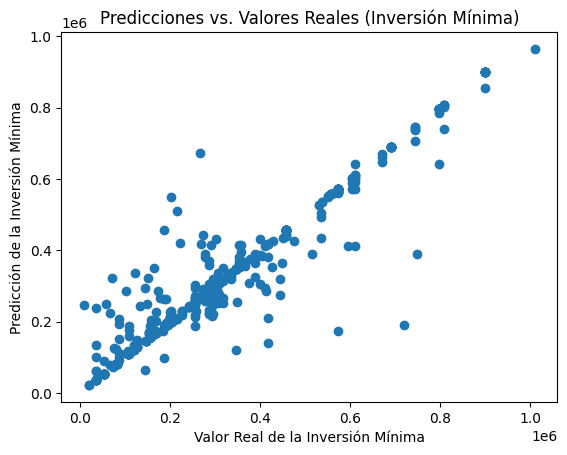

Importancia de las Características:
           Feature  Importance
0  Promedio_Rating    0.879507
2         Longitud    0.085192
1          Latitud    0.035302


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Definir las preferencias de presupuesto del usuario
presupuesto_minimo = 0  # Presupuesto mínimo del usuario
presupuesto_maximo = 1500000  # Presupuesto máximo del usuario

# Filtrar franquicias dentro del rango de presupuesto del usuario
franquicias_filtradas = df_combined_final[
    (df_combined_final['Min_Inversion'] >= presupuesto_minimo) &
    (df_combined_final['Max_Inversion'] <= presupuesto_maximo)
]

# Dividir los datos en conjuntos de entrenamiento y prueba
X = franquicias_filtradas[['Promedio_Rating', 'Latitud', 'Longitud']]
y = franquicias_filtradas[['Min_Inversion', 'Max_Inversion']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión (RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar la validación cruzada en k-fold (por ejemplo, k=5)
k = 5
scores = cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')
mse_mean = -scores.mean()
print(f"Error Cuadrático Medio Promedio (Validación Cruzada {k}-fold): {mse_mean}")

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predictions)
print(f"Error Cuadrático Medio en el Conjunto de Prueba: {mse_test}")

# Visualizar las predicciones vs. valores reales (Inversión Mínima)
plt.scatter(y_test['Min_Inversion'], predictions[:, 0])
plt.xlabel('Valor Real de la Inversión Mínima')
plt.ylabel('Predicción de la Inversión Mínima')
plt.title('Predicciones vs. Valores Reales (Inversión Mínima)')
plt.show()

# Visualizar la importancia de las características
feature_importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Importancia de las Características:")
print(feature_importance_df)


El resultado incluye la evaluación del modelo de regresión con validación cruzada (5-fold) y la importancia de las características:

Error Cuadrático Medio Promedio (Validación Cruzada 5-fold): Este valor es un indicador del rendimiento promedio del modelo en la validación cruzada. En este caso, el modelo se dividió en 5 conjuntos diferentes de entrenamiento y prueba, y se calculó el error cuadrático medio en cada iteración. Luego, se promediaron estos valores para obtener el resultado. Un valor alto de error cuadrático medio indica que el modelo no se ajusta bien a los datos.

Error Cuadrático Medio en el Conjunto de Prueba: Este valor es el error cuadrático medio calculado en el conjunto de prueba que se separó previamente del conjunto de datos. Es una medida del rendimiento del modelo en datos no vistos, lo que significa que es una estimación de cómo funcionaría el modelo en datos futuros. Un valor más bajo de error cuadrático medio en el conjunto de prueba es mejor, ya que indica que el modelo se ajusta mejor a los datos no vistos.

Importancia de las Características: Esta tabla muestra la importancia relativa de cada característica utilizada en el modelo. En este caso, las características se dividen en tres: 'Promedio_Rating', 'Latitud' y 'Longitud'. La columna "Importance" indica cuánto contribuye cada característica a las predicciones del modelo. En tu modelo, 'Promedio_Rating' tiene la importancia más alta, seguida de 'Longitud' y 'Latitud'. Esto significa que 'Promedio_Rating' es la característica más influyente para predecir el rango de inversión.

En resumen, tu modelo tiene un alto error cuadrático medio promedio en la validación cruzada, lo que sugiere que podría no estar ajustando muy bien los datos. Sin embargo, el error cuadrático medio en el conjunto de prueba es significativamente menor, lo que es una señal positiva. La importancia de las características muestra que 'Promedio_Rating' es la característica más importante para las predicciones del modelo. Puedes continuar ajustando y mejorando tu modelo para reducir el error cuadrático medio promedi

In [25]:
# Campos de entrada de usuario
categoria_seleccionada = "Sandwich shop, Caterer, Fast food restaurant, Takeout Restaurant, Restaurant"  # Reemplazar con la categoría deseada
promedio_rating_min = 1.0  # Reemplazar con el valor mínimo deseado
promedio_rating_max = 5.0  # Reemplazar con el valor máximo deseado
nombre_Estado = 'Florida'

# Filtrar franquicias por categoría, rango de promedio de rating y nombre de Estado
franquicias_filtradas = df_reviews_completo[
    (df_reviews_completo['Promedio_Rating'] >= promedio_rating_min) &
    (df_reviews_completo['Promedio_Rating'] <= promedio_rating_max) &
    (df_reviews_completo['Categoria'] == categoria_seleccionada) &
    (df_reviews_completo['Nombre_Estado'] == nombre_Estado)
]

# Ordenar franquicias por promedio de rating descendente
franquicias_filtradas = franquicias_filtradas.sort_values(by='Promedio_Rating', ascending=False)

# Mostrar franquicias recomendadas con información adicional
franquicias_filtradas[['Nombre_Franquicia', 'Promedio_Rating', 'Nombre_Estado']]



,Nombre_Franquicia,Promedio_Rating,Nombre_Estado
6817,Subway,4.6,Florida
6358,Subway,4.5,Florida
6776,Subway,4.5,Florida
6794,Subway,4.4,Florida
6442,Subway,4.4,Florida
...,...,...,...
6448,Subway,3.2,Florida
6302,Subway,3.1,Florida
5431,Subway,3.0,Florida
5225,Subway,3.0,Florida
